In [1]:
%run greedy_search.ipynb
%run brute_force.ipynb
%run variable_neighborhood_search.ipynb

In [2]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
from itertools import accumulate

In [3]:
def load_from_file(filename):
    M=[]
    n=0
    with open(filename,"r") as file:
        lines=file.readlines()
        for line in lines:
            line=line.strip()
            values=tuple(int(x) for x in line.split())
            if n==0:
                n=len(values)
            M.append(values)
    return M,n

In [8]:
def test_gs_large(M,n,plot=False):
    avg_core_size=0
    best_core_size=float('-inf')
    best_core=None
    core_sizes = []
    start=time.time()
    for i in range(20):
        curr_core,_=greedy_search(M,n)
        core_size = len(curr_core)
        avg_core_size+=len(curr_core)
        if core_size>best_core_size:
            best_core_size=core_size
            best_core=curr_core
        core_sizes.append(best_core_size)
    end=time.time()
    print("Greedy search results: ")
    print("Best core size:",len(best_core))
    print("Avg core size:",avg_core_size/20)
    print("Total time: %ssec" %round(end-start,3))
    print("Avg time: %ssec" %round((end-start)/20,3))
    print("Best core:",best_core)

    if plot:
        plt.figure(figsize=(8, 6))

        sizes,counts=np.unique(core_sizes,return_counts=True)
    
        _=plt.bar(sizes, counts, width=0.8, edgecolor='black')
    
        plt.title('Distribucija veličine Hornovog jezgra tokom 20 pokretanja pohlepne pretrage')
        plt.xlabel('Veličina jezgra')
        plt.ylabel('Frekvencija')
        plt.xticks(ticks=np.arange(min(core_sizes), max(core_sizes) + 1))
        plt.yticks(ticks=range(0, max(counts) + 1))
    
        plt.tight_layout()
        plt.savefig('greedy_performance.png')
        plt.show()
        plt.close()


In [9]:
def test_vns_large(M,n,plot=False):
    avg_core_size=0
    best_core_size=float('-inf')
    best_core=None
    core_sizes = []
    start=time.time()
    for i in range(20):
        curr_core,_=variable_neighborhood_search(M,50,5,0.5)
        core_size = len(curr_core)
        avg_core_size+=len(curr_core)
        if len(curr_core)>best_core_size:
            best_core_size=len(curr_core)
            best_core=curr_core
        core_sizes.append(best_core_size)
    end=time.time()
    print("Variable neighborhood results: ")
    print("Best core size:",len(best_core))
    print("Avg core size:",avg_core_size/20)
    print("Total time: %ssec" %round(end-start,3))
    print("Avg time: %ssec" %round((end-start)/20,3))
    print("Best core:",best_core)

    if plot:
        plt.figure(figsize=(8, 6))
        sizes,counts=np.unique(core_sizes,return_counts=True)

        _=plt.bar(sizes, counts, width=0.8, edgecolor='black')
        
        plt.title('Distribucija veličine Hornovog jezgra tokom 20 pokretanja VNSa')
        plt.xlabel('Veličina jezgra')
        plt.ylabel('Frekvencija')
        plt.xticks(ticks=np.arange(min(core_sizes),max(core_sizes)+1))
        plt.yticks(ticks=range(0, max(counts) + 1))
    
        plt.tight_layout()
        plt.savefig('vns_performance.png')
        plt.show()


In [15]:
def test_all_large(M,n,plot=False):
    print("Number of variable:",n)
    print("Number of assignments:",len(M))
    print("M:",M)
    print("")
    test_gs_large(M,n,plot)
    print("")
    test_vns_large(M,n,plot)

In [16]:
M,n=load_from_file("./TestInstances/TestInstances3.txt")
test_all_large(M,n)

Number of variable: 5
Number of assignments: 15
M: [(1, 0, 1, 0, 0), (0, 0, 1, 0, 1), (0, 1, 0, 1, 1), (1, 0, 0, 0, 1), (1, 0, 0, 1, 1), (0, 1, 1, 0, 0), (0, 1, 0, 0, 0), (1, 0, 1, 1, 0), (1, 1, 0, 1, 1), (0, 1, 0, 1, 0), (0, 1, 1, 1, 1), (1, 1, 1, 0, 1), (1, 0, 1, 0, 1), (1, 1, 1, 1, 1), (1, 1, 0, 0, 1)]

Greedy search results: 
Best core size: 7
Avg core size: 5.85
Total time: 0.002sec
Avg time: 0.0sec
Best core: [(1, 1, 0, 1, 1), (1, 1, 1, 0, 1), (1, 0, 1, 0, 1), (1, 1, 1, 1, 1), (1, 0, 0, 0, 1), (1, 1, 0, 0, 1), (1, 0, 0, 1, 1)]

Variable neighborhood results: 
Best core size: 7
Avg core size: 6.6
Total time: 0.143sec
Avg time: 0.007sec
Best core: [(1, 1, 0, 1, 1), (1, 1, 1, 0, 1), (1, 0, 1, 0, 1), (1, 1, 1, 1, 1), (1, 0, 0, 0, 1), (1, 1, 0, 0, 1), (1, 0, 0, 1, 1)]


In [17]:
M,n=load_from_file("./TestInstances/TestInstances4.txt")
test_all_large(M,n)

Number of variable: 5
Number of assignments: 25
M: [(1, 1, 1, 0, 0), (0, 1, 0, 0, 1), (0, 0, 1, 0, 0), (1, 0, 1, 1, 0), (0, 0, 0, 0, 0), (0, 1, 1, 1, 1), (1, 1, 0, 0, 0), (0, 0, 1, 1, 1), (0, 0, 0, 1, 1), (1, 0, 1, 0, 1), (0, 1, 1, 1, 0), (0, 1, 0, 1, 1), (0, 0, 1, 1, 0), (0, 1, 1, 0, 1), (0, 0, 0, 1, 0), (1, 1, 1, 0, 1), (1, 0, 0, 0, 0), (1, 0, 1, 0, 0), (0, 0, 1, 0, 1), (0, 0, 0, 0, 1), (1, 0, 0, 1, 1), (0, 1, 0, 1, 0), (1, 1, 0, 1, 0), (0, 1, 1, 0, 0), (1, 1, 0, 0, 1)]

Greedy search results: 
Best core size: 18
Avg core size: 16.75
Total time: 0.031sec
Avg time: 0.002sec
Best core: [(1, 1, 1, 0, 0), (0, 0, 1, 0, 0), (0, 0, 1, 1, 0), (1, 0, 1, 1, 0), (0, 1, 1, 0, 1), (0, 0, 0, 0, 0), (0, 1, 1, 1, 1), (0, 0, 0, 1, 0), (1, 1, 1, 0, 1), (1, 0, 0, 0, 0), (1, 0, 1, 0, 0), (0, 0, 1, 0, 1), (0, 0, 1, 1, 1), (0, 0, 0, 0, 1), (0, 0, 0, 1, 1), (1, 0, 1, 0, 1), (0, 1, 1, 0, 0), (0, 1, 1, 1, 0)]

Variable neighborhood results: 
Best core size: 18
Avg core size: 17.55
Total time: 0.92sec
Avg tim

In [18]:
M,n=load_from_file("./TestInstances/TestInstances5.txt")
test_all_large(M,n)

Number of variable: 6
Number of assignments: 30
M: [(1, 1, 1, 0, 0, 0), (1, 0, 1, 1, 0, 0), (1, 1, 1, 1, 1, 0), (0, 0, 1, 0, 1, 0), (0, 1, 0, 1, 0, 0), (1, 0, 1, 0, 1, 1), (1, 1, 0, 1, 1, 0), (0, 0, 1, 0, 0, 1), (0, 1, 1, 1, 1, 1), (1, 1, 1, 0, 1, 1), (1, 1, 0, 0, 0, 1), (1, 0, 0, 0, 1, 1), (1, 1, 1, 1, 0, 0), (0, 0, 1, 0, 0, 0), (1, 0, 0, 1, 1, 0), (1, 0, 1, 0, 0, 1), (1, 1, 0, 1, 0, 0), (1, 0, 1, 1, 0, 1), (1, 1, 1, 1, 1, 1), (1, 0, 1, 1, 1, 0), (1, 0, 0, 0, 0, 1), (0, 1, 1, 0, 1, 0), (1, 1, 0, 0, 1, 1), (0, 1, 0, 1, 1, 0), (1, 1, 0, 1, 1, 1), (0, 0, 1, 1, 1, 0), (0, 0, 0, 1, 0, 0), (0, 0, 0, 1, 1, 1), (0, 0, 1, 1, 0, 1), (0, 1, 1, 1, 0, 0)]

Greedy search results: 
Best core size: 10
Avg core size: 8.25
Total time: 0.009sec
Avg time: 0.0sec
Best core: [(0, 0, 1, 0, 0, 0), (0, 0, 1, 0, 1, 0), (1, 1, 1, 0, 1, 1), (1, 0, 1, 0, 0, 1), (1, 0, 1, 0, 1, 1), (1, 0, 1, 1, 0, 1), (1, 1, 1, 1, 1, 1), (0, 0, 1, 0, 0, 1), (0, 0, 1, 1, 0, 1), (0, 1, 1, 0, 1, 0)]

Variable neighborhood results: 
B

In [19]:
M,n=load_from_file("./TestInstances/TestInstances6.txt")
test_all_large(M,n)

Number of variable: 6
Number of assignments: 50
M: [(1, 1, 1, 0, 0, 0), (0, 0, 1, 0, 1, 0), (1, 1, 1, 1, 1, 0), (1, 0, 1, 1, 0, 0), (1, 1, 0, 0, 1, 0), (1, 0, 0, 0, 0, 0), (0, 1, 0, 1, 0, 0), (1, 0, 1, 0, 1, 1), (1, 0, 0, 1, 1, 1), (1, 1, 0, 1, 1, 0), (0, 1, 0, 0, 0, 1), (0, 0, 1, 0, 0, 1), (0, 0, 0, 1, 1, 0), (1, 1, 0, 1, 0, 1), (0, 0, 1, 1, 0, 0), (1, 1, 1, 0, 1, 1), (1, 1, 0, 0, 0, 1), (1, 0, 0, 0, 1, 1), (1, 0, 1, 1, 1, 1), (1, 1, 1, 1, 0, 0), (1, 0, 1, 0, 1, 0), (0, 1, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1), (0, 0, 1, 1, 1, 1), (0, 1, 1, 1, 1, 0), (0, 0, 1, 0, 0, 0), (0, 0, 0, 1, 0, 1), (0, 1, 0, 0, 1, 1), (1, 0, 1, 0, 0, 1), (1, 1, 0, 1, 0, 0), (1, 1, 1, 0, 1, 0), (1, 0, 1, 1, 0, 1), (0, 1, 1, 1, 0, 1), (1, 1, 1, 1, 1, 1), (1, 0, 1, 1, 1, 0), (1, 0, 0, 0, 0, 1), (1, 1, 0, 0, 0, 0), (1, 0, 0, 0, 1, 0), (1, 1, 0, 0, 1, 1), (0, 1, 0, 1, 1, 0), (1, 0, 0, 1, 0, 0), (1, 1, 0, 1, 1, 1), (0, 1, 0, 1, 0, 1), (0, 0, 0, 1, 0, 0), (0, 1, 0, 0, 1, 0), (0, 0, 0, 1, 1, 1), (1, 0, 1, 0, 0, 0), (0, 0, 0

In [20]:
M,n=load_from_file("./TestInstances/TestInstances7.txt")
test_all_large(M,n)

Number of variable: 7
Number of assignments: 60
M: [(1, 0, 0, 0, 1, 1, 1), (0, 1, 1, 1, 0, 0, 1), (1, 0, 1, 1, 1, 0, 1), (0, 0, 1, 1, 0, 0, 1), (0, 0, 0, 1, 0, 0, 0), (0, 0, 0, 1, 1, 0, 0), (1, 1, 0, 0, 1, 0, 1), (0, 1, 0, 0, 0, 1, 1), (0, 1, 1, 0, 0, 1, 0), (0, 1, 1, 1, 1, 0, 0), (0, 0, 1, 1, 1, 0, 0), (1, 1, 1, 1, 0, 1, 1), (1, 0, 0, 1, 0, 1, 1), (0, 1, 0, 0, 1, 1, 1), (0, 1, 0, 1, 0, 1, 0), (0, 1, 1, 1, 1, 1, 1), (1, 1, 0, 1, 1, 0, 0), (0, 0, 1, 0, 1, 1, 0), (1, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 0, 1, 1), (1, 1, 1, 0, 0, 1, 1), (1, 0, 0, 0, 1, 0, 1), (0, 0, 0, 0, 0, 0, 1), (0, 1, 0, 1, 0, 0, 1), (0, 0, 0, 0, 1, 0, 0), (0, 0, 1, 1, 0, 0, 0), (1, 1, 0, 1, 0, 0, 0), (0, 1, 0, 0, 0, 1, 0), (1, 0, 1, 1, 0, 0, 0), (1, 0, 0, 1, 0, 1, 0), (0, 1, 0, 0, 1, 1, 0), (0, 1, 1, 0, 1, 0, 1), (0, 0, 1, 0, 1, 0, 1), (1, 0, 1, 1, 1, 1, 1), (0, 0, 0, 1, 0, 1, 0), (1, 0, 0, 1, 1, 0, 1), (1, 0, 1, 0, 0, 1, 0), (0, 0, 0, 0, 1, 1, 1), (1, 0, 0, 0, 1, 0, 0), (1, 1, 1, 0, 0, 0, 1), (0, 1, 0, 1, 0, 0, 0), (0, 0

In [21]:
M,n=load_from_file("./TestInstances/TestInstances8.txt")
test_all_large(M,n)

Number of variable: 7
Number of assignments: 100
M: [(0, 1, 1, 0, 0, 1, 0), (0, 1, 0, 1, 0, 1, 0), (1, 0, 0, 0, 0, 1, 0), (1, 0, 0, 0, 1, 0, 1), (0, 1, 0, 1, 0, 0, 1), (1, 1, 0, 1, 1, 1, 1), (0, 0, 0, 0, 1, 0, 0), (0, 0, 1, 1, 0, 0, 0), (1, 1, 0, 1, 0, 0, 0), (0, 1, 0, 0, 0, 1, 0), (1, 1, 1, 1, 0, 1, 0), (1, 0, 1, 0, 1, 0, 1), (0, 0, 1, 1, 0, 1, 1), (1, 1, 1, 1, 1, 0, 1), (1, 1, 1, 0, 0, 0, 1), (1, 1, 1, 0, 0, 1, 0), (0, 1, 0, 1, 1, 0, 0), (0, 1, 1, 1, 1, 0, 1), (1, 1, 0, 1, 0, 1, 1), (0, 1, 1, 0, 1, 1, 1), (1, 0, 1, 1, 1, 1, 0), (0, 0, 1, 0, 1, 0, 0), (0, 0, 0, 0, 1, 1, 0), (1, 1, 0, 0, 1, 1, 0), (1, 0, 1, 1, 0, 1, 0), (0, 1, 0, 0, 1, 0, 0), (1, 0, 1, 1, 1, 0, 1), (0, 0, 0, 1, 0, 0, 0), (1, 0, 1, 0, 0, 0, 0), (1, 1, 0, 0, 1, 0, 1), (0, 1, 0, 0, 1, 1, 1), (0, 1, 1, 0, 0, 0, 1), (0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 0, 1, 1, 0), (1, 1, 0, 0, 0, 0, 0), (1, 0, 1, 0, 0, 1, 1), (1, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 1, 0), (0, 1, 1, 1, 0, 0, 0), (1, 0, 0, 1, 1, 0, 1), (1, 

In [33]:
M,n=load_from_file("./TestInstances/TestInstances9.txt")
test_all_large(M,n)

Number of variable: 8
Number of assignments: 50
M: [(0, 0, 0, 1, 1, 1, 1, 1), (1, 1, 1, 0, 1, 1, 1, 0), (1, 1, 0, 0, 0, 0, 0, 1), (1, 1, 0, 0, 0, 0, 1, 0), (1, 0, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 0, 1, 1, 0), (0, 0, 1, 0, 1, 0, 0, 1), (1, 1, 1, 0, 1, 0, 1, 0), (1, 1, 0, 0, 0, 1, 1, 0), (0, 1, 0, 1, 1, 1, 0, 1), (1, 0, 0, 0, 0, 1, 1, 1), (0, 1, 0, 1, 0, 0, 1, 1), (0, 1, 1, 1, 0, 1, 1, 0), (1, 1, 1, 1, 1, 0, 0, 0), (1, 0, 1, 1, 0, 0, 1, 1), (0, 0, 0, 1, 1, 0, 1, 0), (1, 0, 0, 1, 0, 0, 0, 1), (0, 1, 0, 0, 1, 0, 1, 1), (1, 1, 0, 0, 1, 1, 1, 0), (1, 0, 0, 1, 0, 1, 1, 0), (1, 1, 1, 1, 0, 0, 0, 1), (0, 0, 1, 1, 1, 0, 0, 0), (0, 1, 0, 1, 0, 1, 0, 1), (0, 0, 0, 1, 0, 0, 0, 0), (1, 1, 0, 0, 0, 0, 0, 0), (1, 0, 0, 0, 1, 0, 0, 1), (1, 1, 0, 1, 0, 1, 1, 0), (1, 1, 0, 0, 1, 1, 0, 1), (0, 0, 1, 1, 1, 0, 1, 1), (1, 1, 1, 0, 1, 1, 0, 0), (0, 1, 0, 0, 0, 1, 1, 1), (1, 0, 1, 1, 0, 0, 1, 0), (1, 0, 0, 1, 0, 0, 0, 0), (0, 0, 1, 1, 0, 0, 0, 1), (0, 1, 1, 0, 1, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (1, 0, 0, 0,

Number of variable: 8
Number of assignments: 100
M: [(0, 0, 1, 0, 1, 1, 1, 0), (1, 1, 0, 0, 1, 1, 1, 1), (1, 1, 1, 0, 1, 1, 1, 0), (1, 1, 0, 0, 0, 0, 0, 1), (1, 1, 0, 0, 0, 0, 1, 0), (1, 1, 1, 0, 1, 0, 0, 1), (1, 1, 1, 0, 1, 0, 1, 0), (1, 1, 0, 0, 0, 1, 0, 1), (0, 0, 0, 1, 0, 1, 0, 0), (0, 1, 1, 0, 1, 1, 0, 1), (0, 0, 1, 1, 0, 1, 0, 1), (1, 1, 0, 1, 1, 0, 0, 0), (0, 1, 0, 0, 1, 0, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1), (1, 0, 1, 0, 1, 1, 1, 0), (1, 0, 1, 1, 1, 1, 1, 0), (0, 0, 1, 1, 1, 1, 0, 0), (0, 1, 1, 1, 1, 1, 0, 0), (0, 1, 0, 1, 1, 1, 0, 0), (1, 0, 0, 0, 0, 1, 1, 0), (0, 1, 1, 1, 1, 0, 1, 1), (1, 0, 1, 1, 1, 1, 0, 1), (0, 0, 1, 1, 1, 1, 1, 1), (1, 0, 1, 1, 0, 0, 1, 0), (0, 1, 0, 0, 1, 1, 0, 0), (1, 0, 0, 1, 0, 0, 0, 0), (1, 0, 1, 0, 0, 1, 0, 1), (1, 0, 0, 0, 0, 1, 0, 1), (0, 1, 1, 1, 0, 1, 0, 0), (1, 0, 0, 0, 1, 0, 0, 0), (0, 1, 0, 0, 0, 0, 1, 0), (1, 1, 0, 1, 1, 0, 1, 0), (1, 0, 0, 0, 1, 0, 1, 1), (1, 1, 0, 1, 0, 1, 0, 0), (0, 1, 1, 1, 1, 1, 1, 0), (0, 0, 0, 1, 0, 0, 1, 0), (0, 1, 1, 0

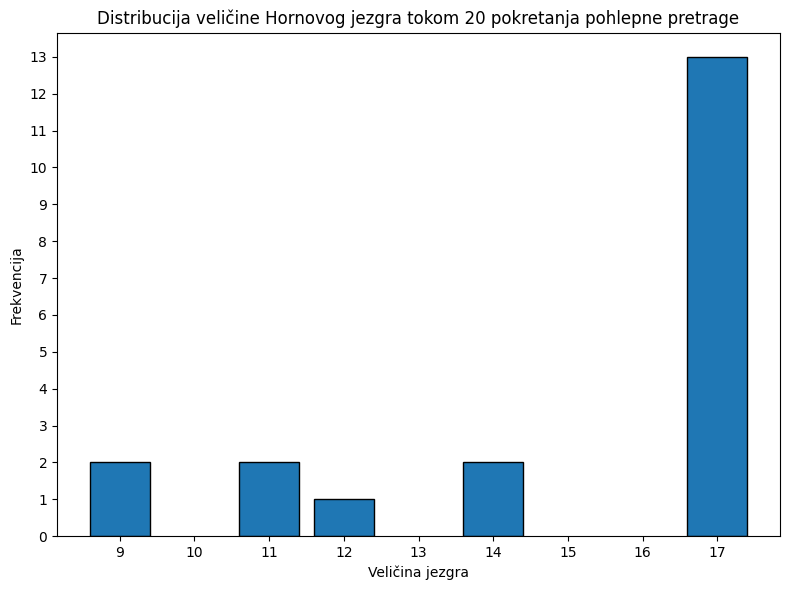


Variable neighborhood results: 
Best core size: 17
Avg core size: 13.3
Total time: 4.351sec
Avg time: 0.218sec
Best core: [(0, 0, 1, 0, 1, 1, 1, 0), (0, 0, 1, 0, 0, 0, 0, 0), (1, 1, 1, 1, 1, 0, 1, 0), (0, 0, 1, 0, 1, 1, 0, 0), (0, 0, 1, 0, 1, 1, 1, 1), (1, 0, 1, 0, 1, 0, 1, 0), (0, 0, 1, 0, 0, 1, 0, 0), (0, 0, 1, 0, 1, 1, 0, 1), (1, 0, 1, 0, 1, 1, 1, 0), (1, 1, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 0, 0, 0), (0, 1, 1, 1, 1, 0, 1, 0), (0, 1, 1, 1, 1, 1, 0, 0), (0, 1, 1, 1, 1, 1, 1, 0), (0, 0, 1, 0, 1, 0, 0, 0), (0, 0, 1, 0, 1, 0, 1, 0), (1, 0, 1, 0, 1, 1, 1, 1)]


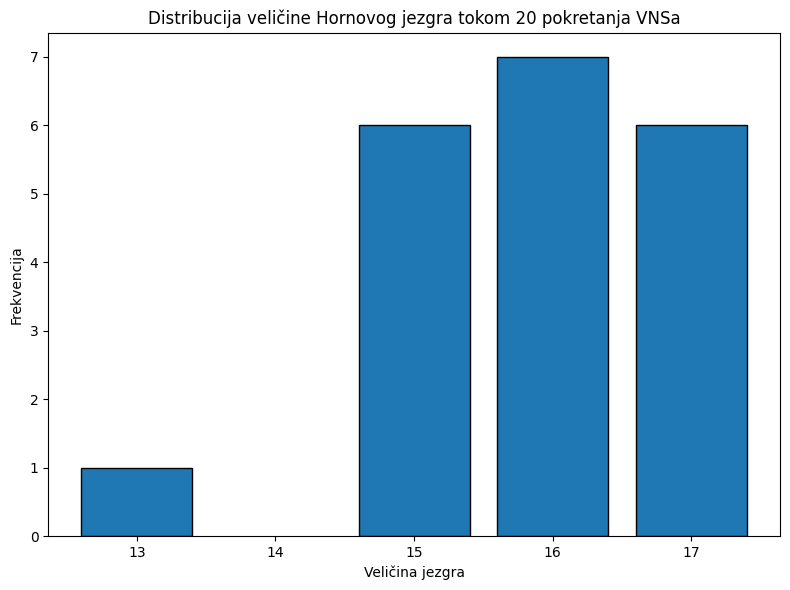

In [25]:
M,n=load_from_file("./TestInstances/TestInstances10.txt")
test_all_large(M,n,True)

Number of variable: 8
Number of assignments: 200
M: [(0, 0, 1, 0, 1, 1, 1, 0), (1, 1, 0, 0, 1, 1, 1, 1), (1, 1, 1, 0, 1, 1, 1, 0), (1, 1, 0, 0, 0, 0, 0, 1), (1, 1, 0, 0, 0, 0, 1, 0), (1, 1, 1, 1, 0, 1, 1, 0), (1, 1, 1, 0, 1, 0, 0, 1), (1, 1, 0, 0, 0, 1, 0, 1), (0, 0, 0, 1, 0, 1, 0, 0), (1, 1, 1, 0, 1, 1, 0, 1), (0, 1, 1, 0, 1, 1, 0, 1), (0, 0, 1, 1, 0, 1, 0, 1), (1, 0, 0, 1, 1, 1, 0, 1), (1, 1, 0, 1, 1, 0, 0, 0), (0, 1, 0, 0, 1, 0, 1, 1), (0, 0, 0, 1, 0, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1), (1, 0, 1, 0, 1, 1, 1, 0), (1, 0, 1, 1, 1, 1, 1, 0), (1, 1, 0, 1, 0, 0, 1, 0), (0, 0, 1, 1, 1, 1, 0, 0), (0, 1, 1, 1, 1, 1, 0, 0), (0, 1, 0, 1, 1, 1, 0, 0), (1, 1, 0, 0, 1, 0, 1, 1), (1, 0, 0, 0, 0, 1, 1, 0), (0, 1, 1, 1, 1, 0, 1, 1), (1, 1, 0, 1, 0, 0, 0, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 0, 0, 1, 1, 0, 0), (1, 0, 1, 1, 0, 0, 1, 0), (1, 0, 1, 0, 0, 1, 0, 1), (0, 1, 0, 1, 0, 0, 0, 1), (1, 1, 0, 1, 1, 1, 0, 0), (0, 0, 1, 0, 0, 0, 0, 1), (1, 0, 0, 0, 1, 0, 0, 0), (0, 1, 0, 0, 0, 0, 1, 0), (1, 1, 0, 1

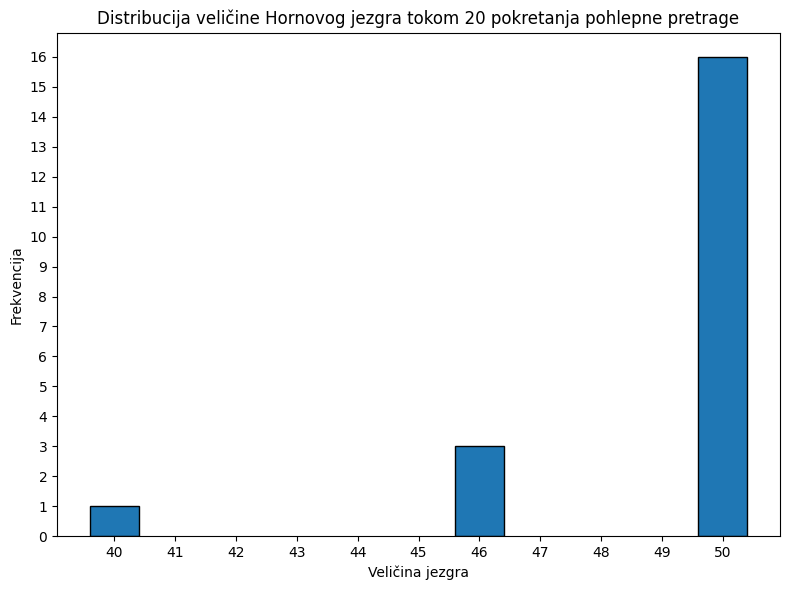


Variable neighborhood results: 
Best core size: 54
Avg core size: 41.95
Total time: 92.92sec
Avg time: 4.646sec
Best core: [(0, 0, 1, 0, 1, 1, 1, 0), (0, 1, 1, 1, 1, 1, 0, 1), (1, 0, 0, 1, 1, 1, 1, 0), (0, 1, 0, 1, 1, 1, 0, 1), (0, 0, 0, 0, 1, 1, 0, 0), (0, 0, 0, 1, 0, 1, 0, 0), (0, 1, 1, 0, 1, 1, 0, 1), (1, 0, 0, 0, 1, 1, 1, 0), (0, 1, 0, 0, 1, 1, 0, 1), (0, 1, 0, 1, 0, 1, 1, 0), (0, 0, 1, 0, 0, 1, 1, 0), (0, 0, 0, 0, 0, 1, 0, 0), (0, 1, 0, 0, 0, 1, 0, 0), (1, 0, 0, 0, 1, 1, 0, 1), (1, 0, 0, 1, 0, 1, 1, 0), (0, 0, 0, 1, 0, 1, 1, 1), (0, 0, 1, 0, 1, 1, 0, 1), (1, 1, 0, 1, 1, 1, 0, 1), (0, 1, 0, 1, 0, 1, 0, 1), (0, 0, 0, 1, 1, 1, 1, 0), (1, 1, 1, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 0, 0), (1, 0, 1, 1, 1, 1, 1, 0), (0, 1, 1, 1, 1, 1, 0, 0), (0, 0, 0, 0, 0, 1, 1, 0), (0, 1, 0, 1, 1, 1, 0, 0), (1, 0, 0, 0, 0, 1, 1, 0), (1, 1, 0, 0, 0, 1, 0, 0), (0, 1, 1, 0, 1, 1, 0, 0), (0, 1, 1, 1, 1, 1, 1, 1), (0, 1, 0, 0, 1, 1, 0, 0), (1, 0, 0, 1, 1, 1, 0, 0), (0, 0, 1, 0, 1, 1, 0, 0), (0, 0, 0, 0, 0, 1

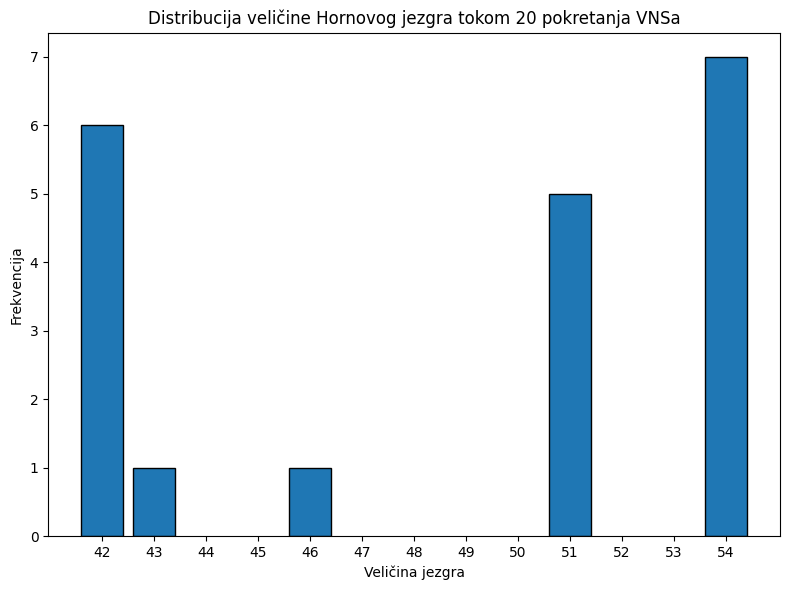

In [34]:
M,n=load_from_file("./TestInstances/TestInstances11.txt")
test_all_large(M,n,True)

In [41]:
M,n=load_from_file("./TestInstances/TestInstances12.txt")
test_all_large(M,n)

Number of variable: 9
Number of assignments: 75
M: [(1, 1, 0, 1, 1, 0, 0, 1, 1), (0, 0, 1, 0, 0, 1, 1, 1, 1), (1, 1, 0, 0, 0, 0, 1, 1, 1), (0, 1, 1, 0, 0, 0, 1, 0, 1), (0, 0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 0, 0, 1, 0, 0, 1, 1), (0, 1, 1, 1, 0, 0, 0, 1, 0), (0, 1, 1, 0, 0, 1, 0, 0, 1), (1, 1, 0, 1, 1, 0, 1, 0, 1), (1, 0, 1, 0, 1, 0, 0, 0, 1), (0, 1, 0, 1, 0, 1, 1, 1, 0), (0, 1, 1, 1, 0, 0, 0, 0, 1), (1, 0, 1, 0, 1, 0, 1, 0, 0), (1, 1, 0, 0, 0, 1, 1, 1, 0), (0, 1, 1, 0, 0, 0, 0, 1, 0), (1, 0, 0, 1, 0, 0, 1, 1, 1), (1, 1, 1, 0, 0, 1, 0, 0, 0), (0, 0, 0, 0, 0, 1, 0, 0, 1), (0, 1, 1, 1, 1, 0, 0, 1, 1), (0, 0, 1, 1, 0, 0, 0, 1, 0), (1, 0, 0, 0, 1, 1, 1, 1, 1), (1, 0, 1, 1, 0, 0, 1, 1, 0), (0, 1, 1, 1, 0, 0, 1, 0, 0), (0, 1, 0, 1, 0, 0, 0, 0, 1), (1, 0, 1, 0, 1, 1, 0, 1, 0), (0, 1, 0, 0, 1, 0, 1, 1, 0), (1, 1, 0, 1, 0, 1, 1, 1, 1), (1, 0, 0, 0, 1, 0, 1, 1, 1), (0, 1, 0, 0, 0, 1, 0, 0, 0), (1, 1, 1, 0, 0, 0, 1, 0, 0), (0, 0, 0, 1, 0, 0, 1, 0, 0), (0, 1, 0, 1, 0, 0, 1, 1, 1), (0, 1, 0, 1, 0, 1, 0

Number of variable: 9
Number of assignments: 150
M: [(1, 1, 1, 1, 1, 0, 0, 0, 0), (1, 1, 0, 1, 1, 0, 1, 0, 1), (0, 1, 0, 1, 1, 0, 1, 1, 0), (1, 1, 1, 0, 1, 1, 0, 1, 0), (0, 0, 1, 1, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 0, 0, 0), (1, 1, 1, 1, 1, 0, 0, 1, 1), (1, 1, 1, 0, 1, 0, 0, 1, 0), (1, 0, 1, 1, 0, 1, 0, 1, 0), (0, 0, 0, 1, 0, 1, 0, 1, 1), (0, 1, 0, 1, 0, 1, 0, 1, 0), (1, 1, 1, 0, 1, 0, 1, 0, 1), (0, 1, 0, 1, 1, 1, 1, 0, 0), (1, 0, 1, 0, 0, 0, 0, 1, 1), (1, 1, 1, 1, 1, 1, 0, 1, 1), (0, 1, 0, 0, 1, 1, 1, 0, 0), (1, 1, 0, 0, 0, 0, 0, 0, 1), (1, 1, 0, 1, 0, 1, 0, 0, 0), (1, 0, 1, 0, 0, 1, 1, 1, 0), (0, 0, 1, 0, 0, 1, 1, 0, 1), (1, 1, 1, 1, 0, 0, 1, 0, 0), (1, 0, 1, 0, 1, 0, 0, 1, 1), (0, 0, 0, 1, 0, 1, 1, 0, 0), (0, 1, 1, 0, 1, 1, 0, 1, 1), (0, 0, 0, 0, 1, 0, 1, 1, 1), (1, 0, 0, 1, 0, 0, 1, 0, 1), (0, 0, 1, 1, 0, 1, 1, 1, 1), (1, 1, 1, 1, 1, 0, 1, 0, 1), (0, 0, 1, 0, 0, 1, 0, 1, 0), (1, 0, 0, 1, 0, 1, 1, 1, 1), (1, 1, 1, 1, 0, 0, 1, 1, 1), (0, 1, 1, 1, 1, 0, 1, 0, 1), (0, 0, 1, 1, 0, 0, 

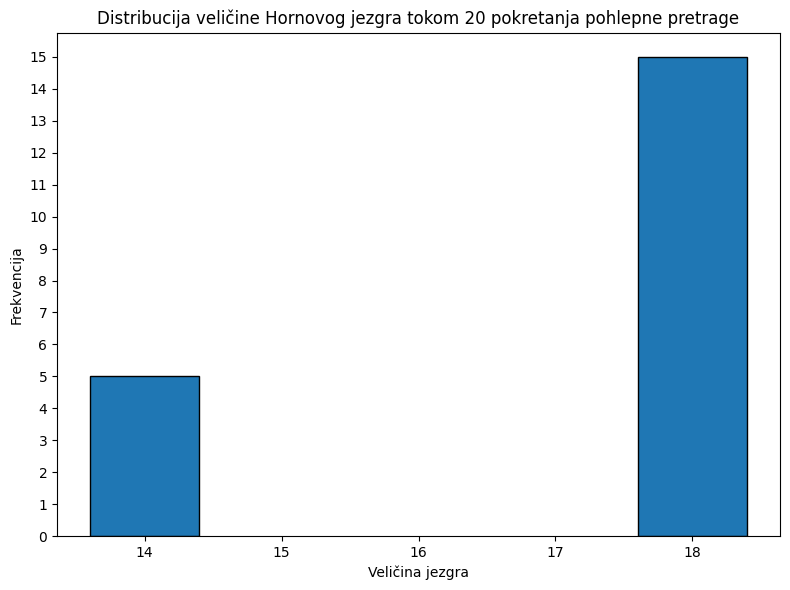


Variable neighborhood results: 
Best core size: 29
Avg core size: 17.9
Total time: 10.703sec
Avg time: 0.535sec
Best core: [(1, 0, 1, 1, 1, 0, 1, 0, 0), (1, 1, 1, 1, 0, 1, 1, 1, 1), (0, 1, 0, 1, 0, 0, 0, 0, 0), (1, 1, 1, 1, 0, 0, 1, 0, 0), (0, 0, 1, 1, 0, 0, 0, 0, 0), (1, 0, 1, 1, 0, 1, 1, 0, 0), (1, 0, 1, 1, 0, 0, 0, 0, 0), (0, 0, 0, 1, 0, 1, 1, 0, 0), (1, 0, 1, 1, 0, 0, 0, 1, 0), (1, 1, 1, 1, 0, 1, 1, 0, 1), (1, 1, 1, 1, 1, 1, 1, 0, 1), (1, 0, 1, 1, 0, 0, 1, 0, 0), (1, 0, 1, 1, 1, 0, 1, 0, 1), (0, 0, 0, 1, 0, 0, 0, 0, 0), (0, 0, 1, 1, 0, 0, 0, 1, 0), (1, 0, 1, 1, 0, 1, 1, 0, 1), (0, 0, 1, 1, 1, 0, 0, 0, 0), (1, 1, 1, 1, 0, 0, 1, 0, 1), (1, 1, 1, 1, 1, 0, 1, 0, 1), (1, 1, 1, 1, 0, 0, 1, 1, 0), (1, 1, 1, 1, 1, 0, 1, 1, 1), (1, 0, 1, 1, 0, 1, 0, 1, 0), (0, 1, 0, 1, 0, 1, 0, 0, 0), (0, 0, 0, 1, 0, 0, 1, 0, 0), (1, 0, 1, 1, 0, 0, 1, 0, 1), (0, 0, 0, 1, 0, 0, 0, 0, 1), (1, 1, 1, 1, 0, 0, 1, 1, 1), (1, 0, 1, 1, 0, 1, 0, 0, 0), (0, 0, 0, 1, 0, 1, 0, 0, 0)]


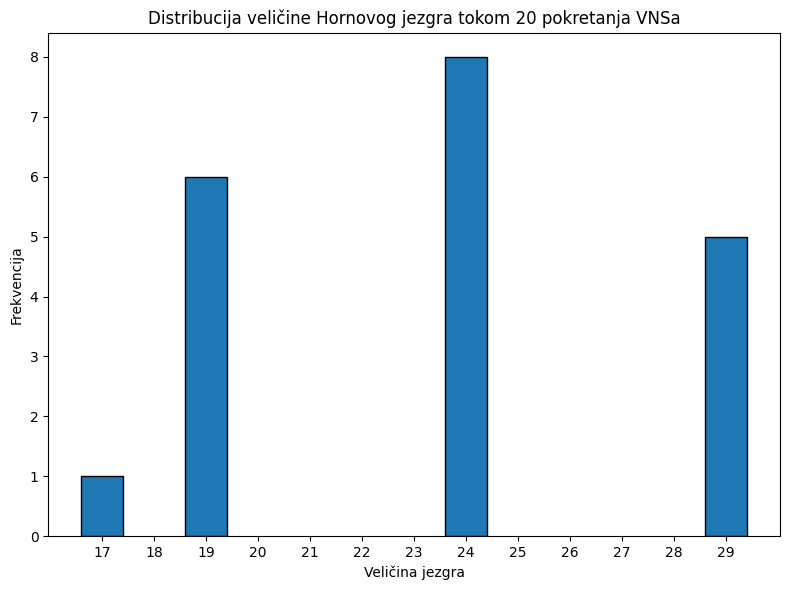

In [42]:
M,n=load_from_file("./TestInstances/TestInstances13.txt")
test_all_large(M,n,True)

In [43]:
M,n=load_from_file("./TestInstances/TestInstances14.txt")
test_all_large(M,n)

Number of variable: 9
Number of assignments: 225
M: [(0, 0, 0, 0, 0, 1, 0, 1, 0), (1, 1, 1, 0, 1, 1, 0, 1, 0), (1, 1, 0, 1, 1, 0, 1, 0, 1), (1, 1, 0, 0, 0, 0, 1, 1, 1), (0, 1, 0, 0, 1, 1, 0, 0, 1), (0, 1, 1, 1, 0, 0, 0, 0, 1), (0, 0, 1, 1, 1, 1, 0, 0, 0), (0, 1, 0, 0, 1, 0, 0, 1, 0), (1, 1, 1, 1, 1, 0, 0, 1, 1), (1, 1, 1, 1, 0, 0, 0, 0, 1), (0, 1, 0, 1, 1, 0, 1, 0, 1), (1, 0, 0, 0, 0, 1, 1, 1, 1), (1, 1, 1, 0, 0, 0, 0, 0, 0), (1, 1, 1, 0, 1, 0, 0, 0, 1), (0, 0, 0, 1, 1, 1, 1, 1, 0), (1, 0, 1, 0, 1, 1, 0, 1, 0), (0, 1, 0, 0, 1, 0, 1, 1, 0), (0, 1, 0, 1, 0, 1, 0, 1, 0), (0, 1, 0, 0, 1, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 0, 1), (1, 0, 1, 0, 1, 0, 0, 0, 0), (1, 1, 1, 1, 1, 1, 0, 1, 1), (0, 1, 1, 0, 1, 0, 1, 1, 0), (0, 0, 1, 1, 1, 0, 0, 0, 1), (0, 1, 0, 0, 1, 1, 1, 0, 0), (0, 0, 1, 1, 0, 1, 0, 0, 0), (1, 0, 0, 1, 0, 0, 1, 1, 0), (0, 0, 0, 0, 1, 0, 1, 0, 0), (0, 1, 0, 1, 1, 1, 1, 1, 1), (1, 1, 0, 0, 0, 0, 0, 0, 1), (1, 1, 0, 1, 0, 1, 0, 0, 0), (1, 0, 1, 0, 0, 1, 1, 1, 0), (1, 0, 0, 0, 0, 0, 

In [44]:
M,n=load_from_file("./TestInstances/TestInstances15.txt")
test_all_large(M,n)

Number of variable: 10
Number of assignments: 100
M: [(0, 0, 1, 1, 1, 0, 1, 0, 0, 1), (1, 0, 1, 1, 1, 1, 0, 1, 0, 1), (0, 0, 1, 1, 1, 1, 0, 0, 0, 0), (1, 0, 0, 1, 1, 1, 1, 1, 0, 1), (1, 1, 1, 1, 0, 0, 0, 0, 1, 1), (1, 0, 1, 0, 0, 1, 0, 1, 0, 1), (0, 0, 1, 1, 0, 0, 1, 0, 0, 0), (0, 0, 0, 0, 0, 0, 1, 1, 0, 1), (0, 0, 1, 0, 1, 1, 0, 0, 1, 0), (1, 1, 1, 0, 0, 1, 0, 1, 0, 1), (1, 0, 0, 1, 0, 0, 0, 0, 0, 0), (1, 0, 1, 1, 0, 1, 1, 1, 0, 1), (1, 0, 0, 1, 0, 0, 1, 0, 1, 1), (0, 0, 1, 1, 0, 0, 1, 1, 1, 1), (1, 1, 1, 1, 0, 0, 1, 0, 0, 1), (1, 0, 1, 1, 1, 1, 0, 1, 1, 1), (1, 0, 0, 0, 0, 0, 0, 1, 0, 0), (1, 1, 1, 0, 1, 0, 1, 1, 1, 0), (0, 1, 1, 0, 0, 0, 1, 1, 0, 1), (0, 1, 1, 1, 1, 0, 1, 1, 1, 0), (1, 0, 0, 1, 1, 0, 1, 1, 0, 1), (0, 0, 1, 1, 1, 1, 0, 1, 0, 0), (0, 1, 0, 1, 0, 0, 1, 1, 0, 1), (0, 0, 0, 1, 0, 0, 0, 0, 1, 0), (0, 0, 1, 0, 0, 0, 1, 0, 0, 1), (1, 1, 1, 1, 1, 1, 1, 1, 1, 1), (0, 0, 1, 0, 0, 1, 0, 0, 1, 1), (0, 1, 0, 1, 1, 0, 1, 1, 0, 1), (1, 0, 0, 1, 1, 0, 0, 0, 1, 0), (1, 1, 0, 1, 0, 0,

In [46]:
M,n=load_from_file("./TestInstances/TestInstances16.txt")
test_all_large(M,n)

Number of variable: 10
Number of assignments: 200
M: [(0, 1, 1, 0, 0, 1, 1, 0, 0, 1), (0, 0, 1, 1, 0, 0, 0, 1, 1, 0), (1, 0, 0, 0, 0, 1, 0, 0, 0, 0), (1, 1, 1, 0, 1, 1, 1, 1, 1, 0), (1, 1, 0, 1, 0, 0, 0, 1, 0, 0), (0, 1, 1, 0, 1, 1, 0, 1, 0, 0), (1, 0, 1, 1, 0, 0, 1, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 0, 1, 1), (1, 0, 1, 1, 1, 1, 0, 1, 0, 1), (0, 1, 1, 0, 0, 0, 0, 1, 0, 0), (0, 0, 0, 0, 1, 0, 0, 1, 1, 1), (0, 1, 0, 1, 0, 0, 0, 0, 1, 0), (1, 1, 1, 1, 1, 1, 1, 0, 0, 0), (0, 1, 1, 1, 1, 1, 1, 1, 1, 0), (0, 1, 0, 0, 1, 1, 1, 0, 0, 0), (1, 0, 0, 1, 0, 1, 1, 0, 0, 0), (1, 0, 0, 0, 0, 1, 0, 0, 1, 1), (1, 0, 1, 1, 0, 1, 1, 1, 0, 1), (0, 0, 0, 0, 1, 1, 1, 1, 1, 0), (0, 0, 0, 1, 1, 0, 1, 1, 0, 1), (0, 1, 0, 0, 1, 0, 1, 1, 0, 0), (1, 1, 0, 0, 0, 1, 1, 1, 0, 0), (1, 1, 1, 0, 0, 1, 1, 1, 0, 0), (1, 0, 0, 0, 1, 1, 1, 0, 0, 0), (0, 1, 0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 0, 1, 0, 0, 1, 1, 0, 1), (1, 1, 0, 0, 1, 0, 1, 1, 1, 0), (0, 0, 0, 0, 0, 1, 0, 0, 1, 1), (1, 0, 0, 0, 1, 1, 0, 0, 1, 0), (1, 1, 1, 1, 0, 1,

In [47]:
M,n=load_from_file("./TestInstances/TestInstances17.txt")
test_all_large(M,n)

Number of variable: 10
Number of assignments: 300
M: [(1, 1, 0, 1, 1, 0, 1, 0, 1, 0), (1, 1, 1, 1, 1, 0, 1, 1, 1, 0), (0, 0, 1, 0, 1, 1, 1, 0, 0, 0), (0, 1, 0, 0, 1, 1, 0, 1, 1, 0), (1, 1, 1, 0, 1, 1, 1, 1, 1, 0), (0, 1, 1, 0, 1, 1, 0, 1, 0, 0), (1, 0, 0, 0, 1, 1, 1, 1, 0, 1), (1, 1, 0, 1, 1, 0, 1, 1, 0, 0), (1, 0, 1, 1, 1, 0, 1, 0, 1, 1), (0, 1, 1, 1, 1, 1, 0, 0, 1, 1), (1, 1, 1, 1, 1, 0, 0, 1, 0, 0), (1, 1, 0, 0, 1, 0, 1, 0, 0, 1), (1, 1, 1, 0, 0, 1, 0, 1, 1, 0), (0, 0, 1, 1, 1, 1, 1, 0, 0, 1), (0, 0, 0, 1, 0, 1, 1, 1, 0, 0), (0, 0, 1, 1, 1, 1, 0, 0, 0, 0), (0, 0, 0, 0, 1, 0, 0, 1, 1, 1), (0, 1, 0, 1, 0, 0, 0, 0, 1, 0), (1, 1, 0, 1, 0, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1, 1, 0), (1, 0, 1, 1, 0, 0, 1, 1, 0, 0), (0, 0, 1, 0, 1, 1, 1, 1, 1, 1), (0, 1, 0, 1, 1, 1, 0, 1, 0, 1), (1, 0, 0, 1, 1, 0, 0, 1, 0, 0), (0, 0, 1, 0, 1, 1, 0, 0, 1, 0), (0, 0, 0, 0, 0, 0, 0, 1, 1, 0), (1, 1, 0, 0, 0, 0, 1, 1, 0, 0), (1, 1, 0, 1, 1, 0, 0, 1, 0, 1), (0, 1, 0, 1, 1, 0, 0, 0, 1, 0), (0, 1, 1, 0, 1, 0,

In [48]:
random.seed(42)

In [49]:
def gs_core_size_over_iterations(M,n):
    core,core_sizes=greedy_search(M,n)
    
    plt.figure(figsize=(8, 6))
    iterations=range(1,len(core_sizes)+1)

    plt.plot(iterations, core_sizes, linestyle='-', color='b')
    
    plt.title('Veličina Hornovog jezgra tokom iteracija pohlepne pretrage')
    plt.xlabel('Iteracija')
    plt.ylabel('Veličina jezgra')
    y_ticks = range(int(min(core_sizes)), int(max(core_sizes)) + 1,2)
    plt.yticks(y_ticks)
    
    plt.tight_layout()
    plt.savefig('greedy_performance.png')
    plt.show()
    plt.close()


In [50]:
def vns_core_size_over_iterations(M,n):
    core,core_sizes=variable_neighborhood_search(M,50,5,0.5)

    plt.figure(figsize=(8, 6))
    iterations=range(1,len(core_sizes)+1)

    plt.plot(iterations, core_sizes, linestyle='-', color='b')
    
    plt.title('Veličina Hornovog jezgra tokom iteracija VNSa')
    plt.xlabel('Iteracija')
    plt.ylabel('Veličina jezgra')
    y_ticks = range(int(min(core_sizes)), int(max(core_sizes)) + 1)
    plt.yticks(y_ticks)
    
    plt.tight_layout()
    plt.savefig('vns_performance.png')
    plt.show()
    plt.close()


In [51]:
def test_all_plots(M,n):
    gs_core_size_over_iterations(M,n)
    print("")
    vns_core_size_over_iterations(M,n)

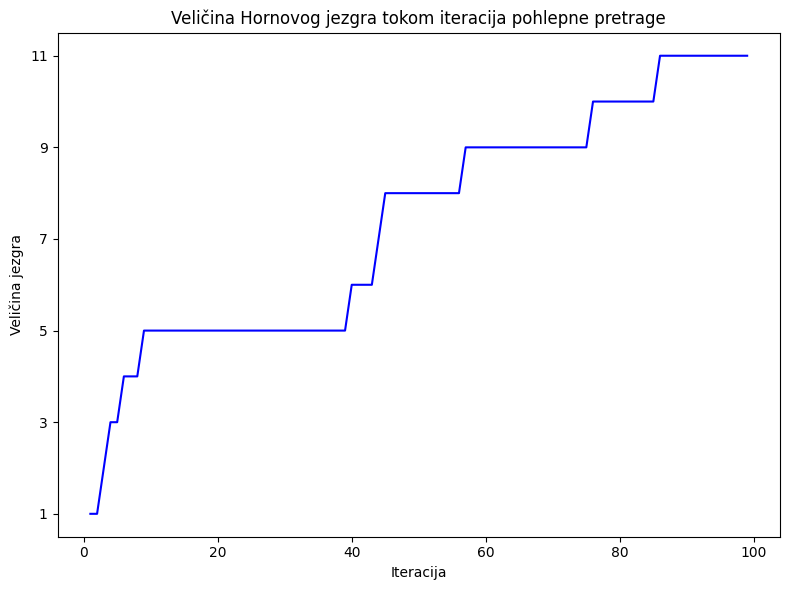

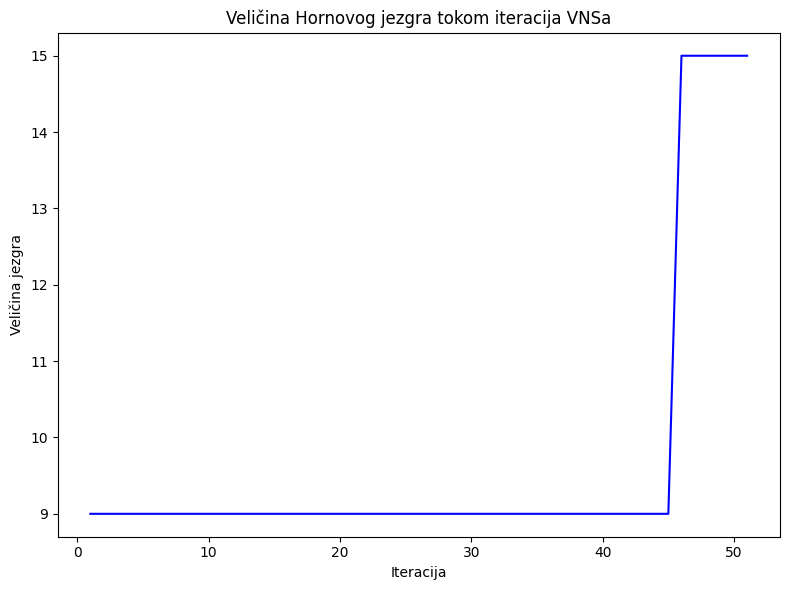

In [54]:
M,n=load_from_file("./TestInstances/TestInstances10.txt")
test_all_plots(M,n)

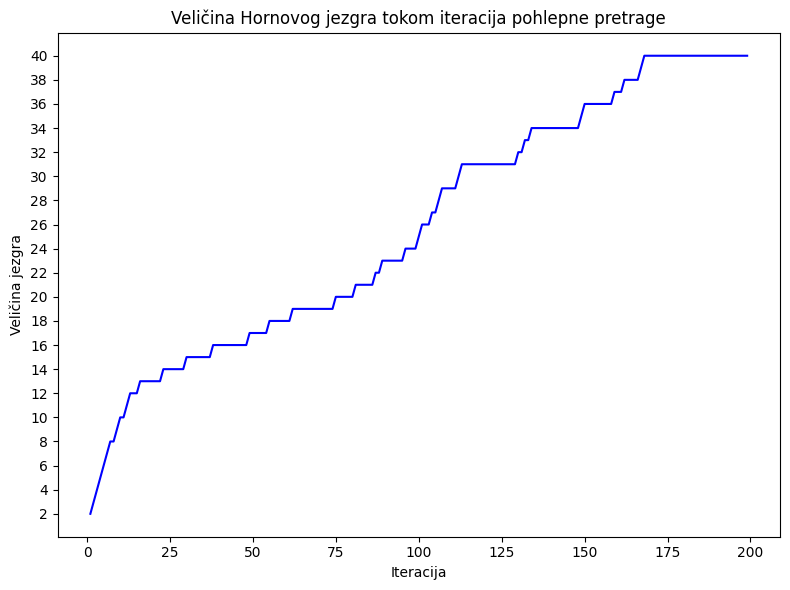

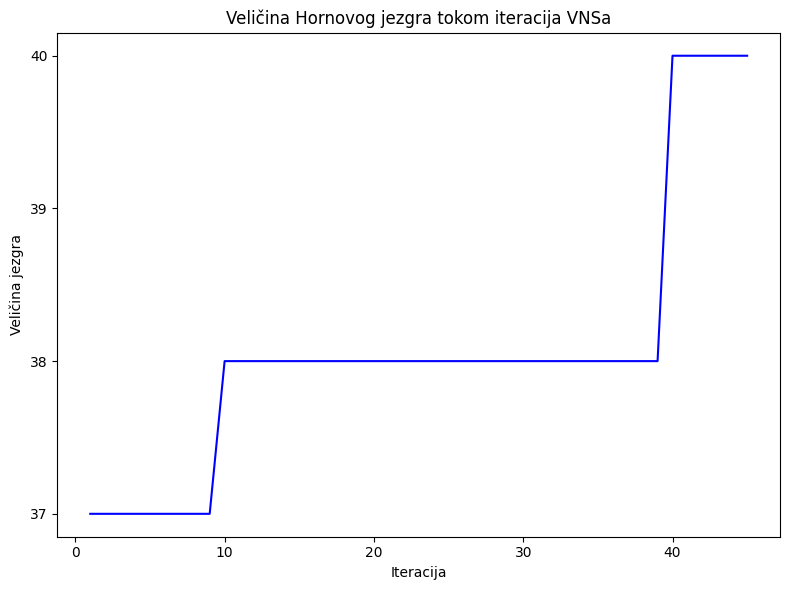

In [57]:
M,n=load_from_file("./TestInstances/TestInstances11.txt")
test_all_plots(M,n)

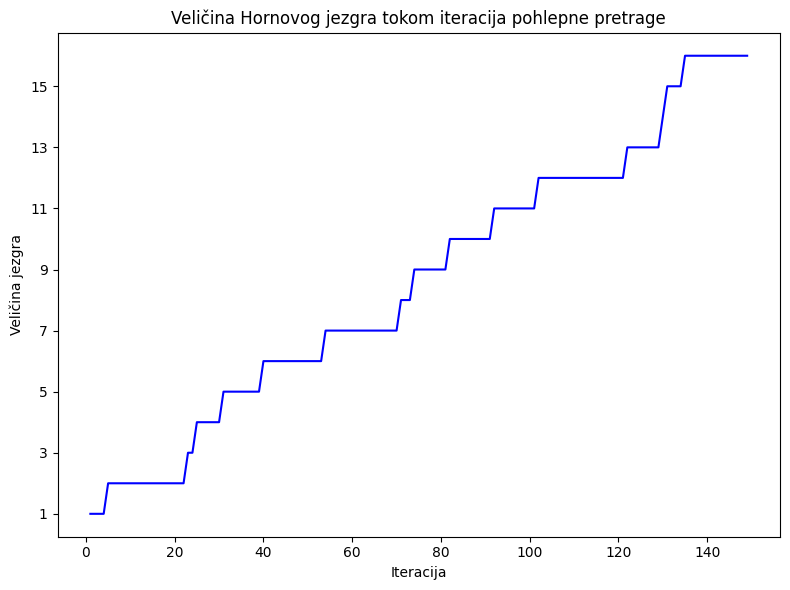

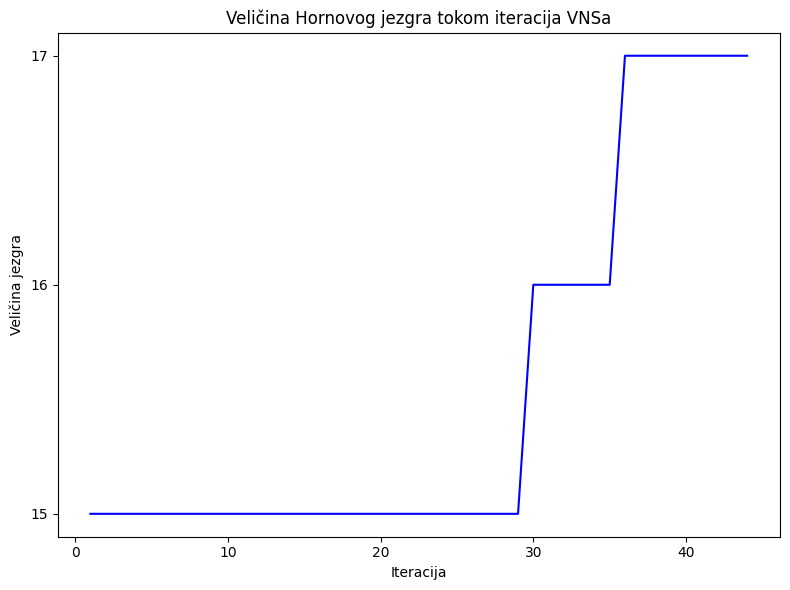

In [66]:
M,n=load_from_file("./TestInstances/TestInstances13.txt")
test_all_plots(M,n)